# Support Vector Machines

Hey all welcome to session x , Today we'll be covering another machine learning model called the SVM majorly used to solve classification problems
although this can be used in regressions too.


## Support Vector Classifier
Let's start this off with something called a support vector classifier.

The basic idea of a Support Vector Classifier is to make a decision boundary in between the "support vectors" which is basically the "end points" of each of the
classification regions

<img src="assets/svedge.png"></img>

Once these support vectors have been found out we take the mean position between this and draw a line to demarcate the decision boundary.

<img src="assets/svclassify.png"></img>

The problem with doing this is that it varies a lot depending on the data which implies it doesn't do so well with outliers in the dataset, such as this

<img src="assets/svoutlier.png"></img>

In order to deal with this SV classfiers have "Soft Margins" which let outliers exist without making a ridiculously stupid decision boundary.This Soft Margin is decided 
by using <br>Cross Validation to determine number of outliers to be allowed.

<img src="assets/svoutlierbound.png"></img>

Sooo.. SV classifiers look cool right since they can handle outliers as well ,well yes but also no. SV classifiers fail to work when there's a lot more overlap <br>than in the above
diagrams ,like this

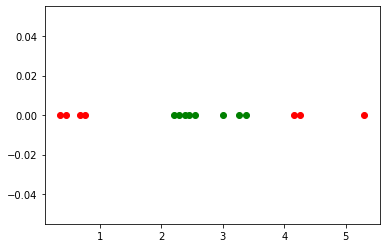

In [1]:
import matplotlib.pyplot as plt
import numpy as np
cured_doses = np.array([2.21,2.29,2.38,2.45,2.54,3,3.26,3.38])
cured_plot = np.zeros((8))

notcured_doses = np.array([0.35,0.45,0.67,0.75,4.15,4.26,5.3])
notcured_plot = np.zeros((7))

plt.plot(cured_doses,cured_plot,'go')
plt.plot(notcured_doses,notcured_plot,'ro')
plt.show()

These are the sort of problems in which SVMs really shine

## SVMs

To deal with this problem SVMs introduce an extra dimension based off of which making the decision boundary more reliable.
This extra dimension is found by <br>using something called a kernal function. 

For example ,in the above case of Dosage of medicine that cures people, upon using a kernal function of f (x) = x<sup>2</sup> we get the below 2D figure.

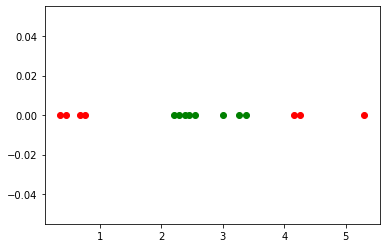

In [2]:
import matplotlib.pyplot as plt
import numpy as np
cured_doses = np.array([2.21,2.29,2.38,2.45,2.54,3,3.26,3.38])
cured_plot = np.zeros((8))

notcured_doses = np.array([0.35,0.45,0.67,0.75,4.15,4.26,5.3])
notcured_plot = np.zeros((7))

plt.plot(cured_doses,cured_plot,'go')
plt.plot(notcured_doses,notcured_plot,'ro')
plt.show()

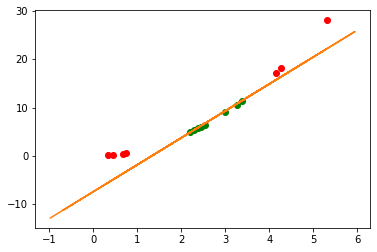

In [3]:
cured_squared = np.square(cured_doses)
notcured_squared = np.square(notcured_doses)


plt.plot(cured_doses,cured_squared,'go')
plt.plot(notcured_doses,notcured_squared,'ro')

# Drawing the decision boundary
plt.plot([2.21,3.38],[4.8841,11.4244])
m = (11.4244-4.8841)/(3.38-2.21)
c = 11.4244 - m*3.38
boundary_x = np.random.uniform(-1,6,20)
boundary_y = boundary_x*m +c
plt.plot(boundary_x,boundary_y)
plt.show()

As visible a good enough decision boundary is possible by using a Support Vector Classifier upon using a kernal funtion.



Like in the above example we used a f (x) = x<sup>2</sup> which is a very rudimentary display of how an SVM works. Usually the kernal functions used include

- linear
- non-linear
- polynomial
- radial basis function
- sigmoid
    
    
So you might be thinking to yourself why bother with SVM when you have Logistic Regression ,some of the answers to this include

- SVM works well with unstructured or semi-structured data unlike logistic regression which works with already identified variables.
- The risk of overfitting with Logistic regression is high where as due to the soft margin property of support vector classifiers this is 
  often well dealt with in SVMs.
- SVMs also deal with outliers really well as discussed before

Another significant benifit of using SVM is that making complex decision boundaries is a lot easier as compared to using Logistic Regression as long as
we choose the right kernel function

For example:

<img src="assets/logisticfail.jpeg"></img>


Logistic Regression models are good at making linear decision boundaries but in circular cases like this it often fails miserably thus making options like SVM
far more accurate.

## Using SVM on Titanic Dataset

In [4]:
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('./data/train.csv')
#test_df = pd.read_csv('./data/test.csv')

# Getting a look at the first few rows of the dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(f'Shape of training data set: {train_df.shape}')
#print(f'Shape of test data set: {test_df.shape}')

Shape of training data set: (891, 12)


### Some Basic EDA

Figuring out the null values in the data set and dealing with them is an essential part to using any ML models.

<AxesSubplot:>

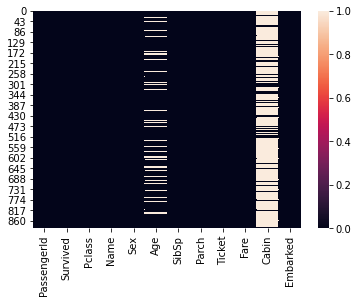

In [6]:
sns.heatmap(train_df.isnull())

In [7]:
train_df.isnull().sum()
# This gives us a clearer picture of which columns have predominantly null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Be sure to run "pip install pandas-profiling" in your Anaconda/Ubuntu terminal before running this cell
import pandas_profiling

pandas_profiling.ProfileReport(train_df)
# This is a package that gives us a good brief overview of our entire data set

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def bar_chart(feature):
    survived = train_df[train_df['Survived'] == 1][feature].value_counts()
    dead = train_df[train_df['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

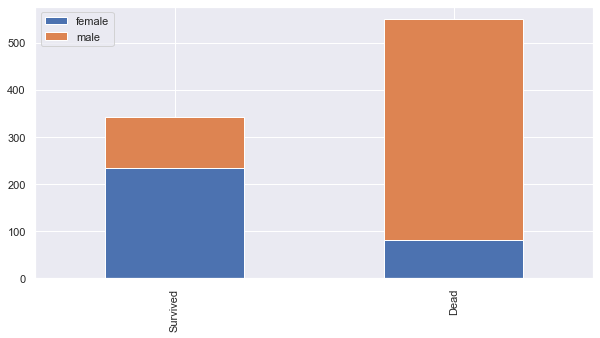

In [10]:
# Relation between surviving and sex
bar_chart('Sex')

CONCLUSION: As is clear from the chart we can conclude that females were more likely to survive as compared to males

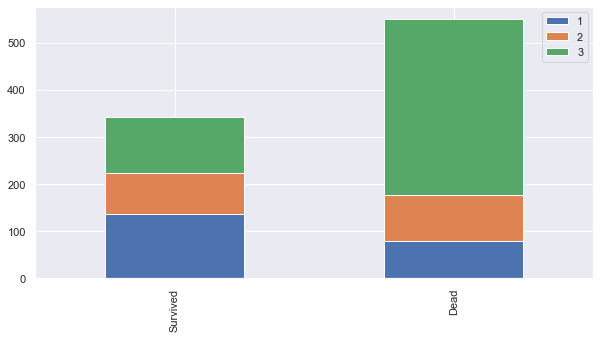

In [11]:
# Relation between Ticket Class and Surviving
bar_chart('Pclass')

CONCLUSION: Lower the ticket class better the chances of survival

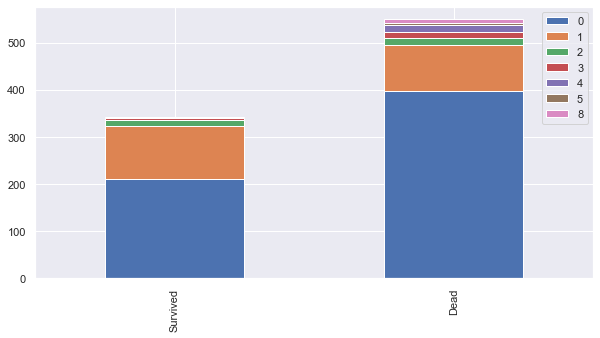

In [12]:
# Relation between no. of siblings or spouses
bar_chart('SibSp')

CONCLUSION: Lesser the number of siblings you have better the survival chances

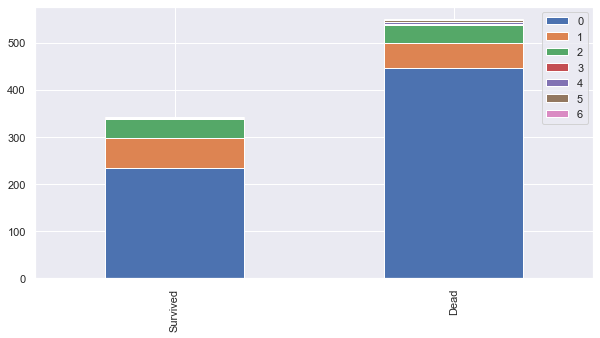

In [13]:
# Relation between no. of parents and children to surviving
bar_chart('Parch')

CONCLUSION: Lesser the number of parents or children better survival

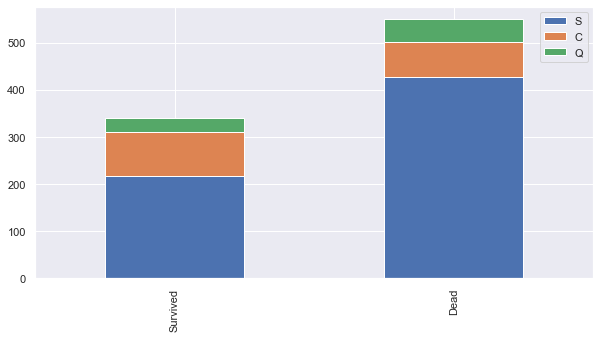

In [14]:
# Port Embarked at to survivor relation
bar_chart('Embarked')

CONCLUSION: People who got on at S are more likely to die than in the other areas

### Feature Engineering

This is very essential step, as what you feed your model is what determines how accurate it is.One of the major things to do in regards to this is<br>
to deal with the null values in the data set.

0


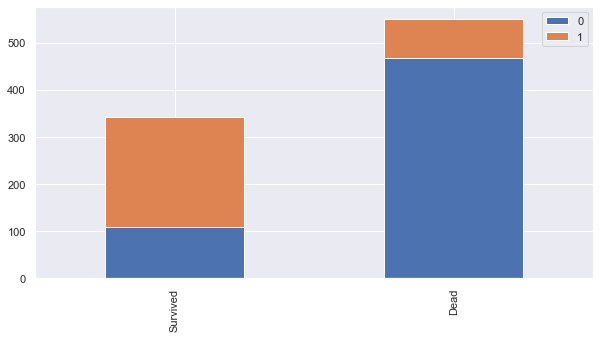

In [15]:
sex_mapping = {"male":0,"female":1}

print(sex_mapping["male"])

def remapFunc(sex):
    return sex_mapping[sex]

for idx,row in train_df.iterrows():
    train_df.loc[idx,'Sex'] = remapFunc(train_df.loc[idx,'Sex'])


    
bar_chart('Sex')

### Filling in the null values

In [16]:
# Removing na values in Fare

train_df['Fare'].fillna(train_df.groupby("Pclass")["Fare"].transform("median"),inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Removing na values in Embarked

train_df.Embarked[train_df.Embarked.isnull()] = train_df.Embarked.dropna().mode().values

<ipython-input-17-abf713b809d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.Embarked[train_df.Embarked.isnull()] = train_df.Embarked.dropna().mode().values


In [18]:
# Dealing with multiple values in Cabin
train_df['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
D              3
              ..
B42            1
A23            1
A20            1
C95            1
C85            1
Name: Cabin, Length: 147, dtype: int64

In [19]:
train_df['Cabin'] = train_df['Cabin'].str[:1]

<AxesSubplot:>

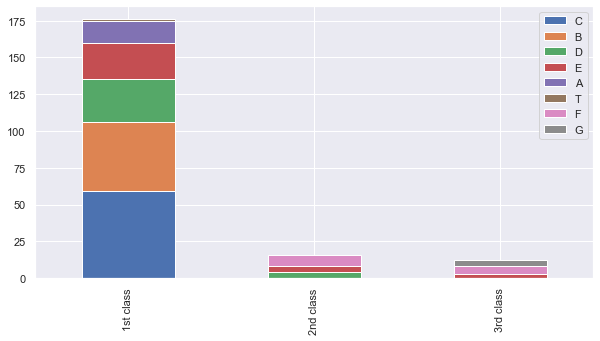

In [20]:
# Representation of Pclass

Pclass1 = train_df[train_df['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train_df[train_df['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train_df[train_df['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [21]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}

train_df['Cabin'] = train_df['Cabin'].map(cabin_mapping)

In [22]:
# fill missing Fare with median fare for each Pclass

train_df["Cabin"].fillna(train_df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0.8,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.8,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2.0,S


In [23]:
# Droping ticket column

train_df.drop(['Ticket'], axis = 1, inplace = True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0.8,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0.8,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2.0,S


In [24]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [25]:
# Filling Age null values with mean of non-null values
train_df['Age'].fillna((train_df['Age'].mean()),inplace=True)
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [26]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,2.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,0.8,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,2.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,0.8,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,2.0,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,1.8,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,0.4,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,23.4500,2.0,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,0.8,C


### Now we proceed to Hot-Encode Parch and Embarked since they have only 1 among 3 values

In [27]:
# Pclass Hot Encoding

dummy_df = pd.get_dummies(train_df.Pclass, drop_first = True)
dummy_df = dummy_df.rename(columns=lambda x: 'Pclass_' + str(x))
train_df = pd.concat([train_df, dummy_df], axis=1)

In [28]:
# Embarked Hot Encoding

dummy_df = pd.get_dummies(train_df.Embarked, drop_first = True)
dummy_df = dummy_df.rename(columns=lambda x: 'Embarked_' + str(x))
train_df = pd.concat([train_df, dummy_df], axis=1)

In [29]:
# Getting rid of some redundant columns
features_drop = ['SibSp', 'Parch', 'Pclass', 'Embarked','Name']

train_df = train_df.drop(features_drop, axis=1)
train_df = train_df.drop(['PassengerId'], axis=1)

### Using SVM on the train_df

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
train_data = train_df.drop(['Survived'], axis=1)
target = train_df['Survived']
print(f'size of train_data {train_data.shape} size of target {target.shape}')

size of train_data (891, 8) size of target (891,)


In [31]:
clf = SVC()
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score[1])

0.7865168539325843


In [32]:
train_data.columns

Index(['Sex', 'Age', 'Fare', 'Cabin', 'Pclass_2', 'Pclass_3', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')